## Starter Code


In [13]:
import pandas as pd

In [15]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [17]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [19]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [21]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [25]:
df = pd.read_csv('lending_club_loan_two.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  


# Section 1: Exploratory Data Analysis

----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<Axes: xlabel='loan_status', ylabel='count'>

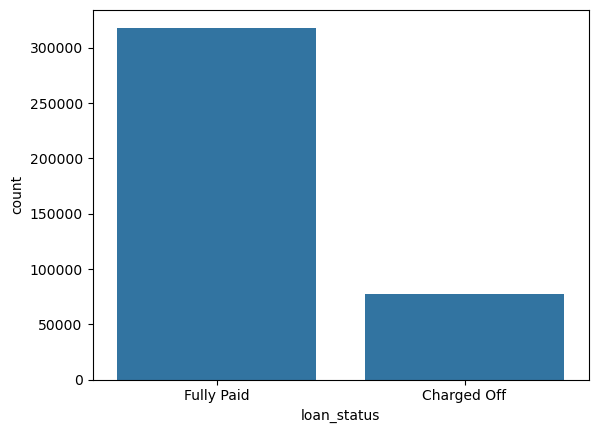

In [29]:
sns.countplot(x='loan_status',data=df)

**TASK: Create a histogram of the loan_amnt column.**

(0.0, 45000.0)

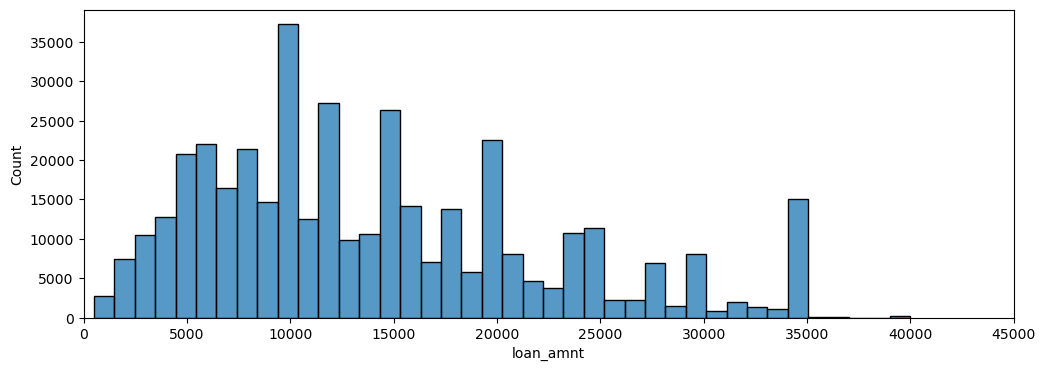

In [31]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [35]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap.**

(10.0, 0.0)

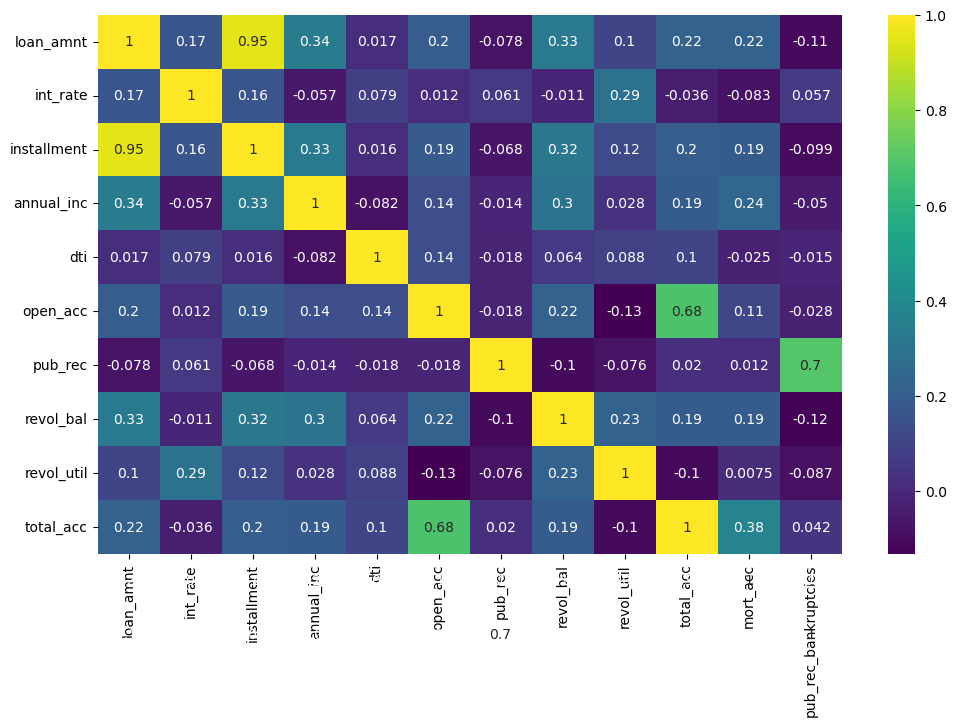

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.ylim(10, 0)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [17]:
# CODE HERE

In [41]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [43]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

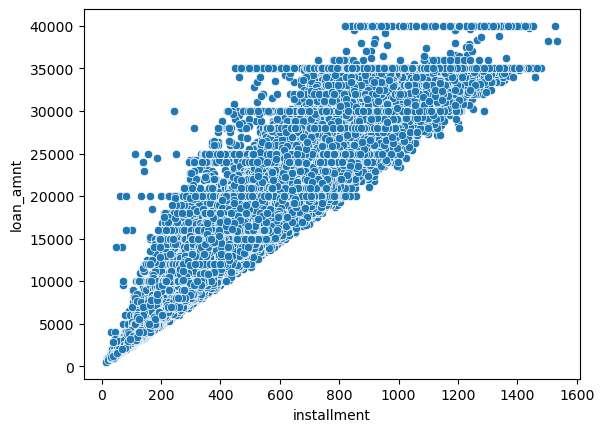

In [45]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [21]:
# CODE HERE

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

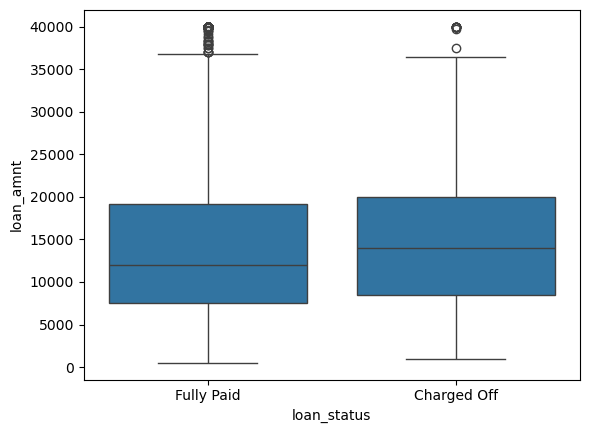

In [47]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [23]:
# CODE HERE

In [49]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [51]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [53]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<Axes: xlabel='grade', ylabel='count'>

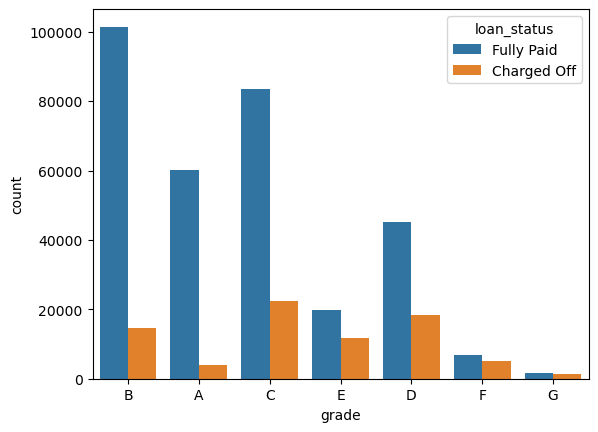

In [55]:
sns.countplot(x='grade',data=df,hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and reorder the x axis.**

C:\Users\sahde\AppData\Local\Temp\ipykernel_27120\3676733108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )


<Axes: xlabel='sub_grade', ylabel='count'>

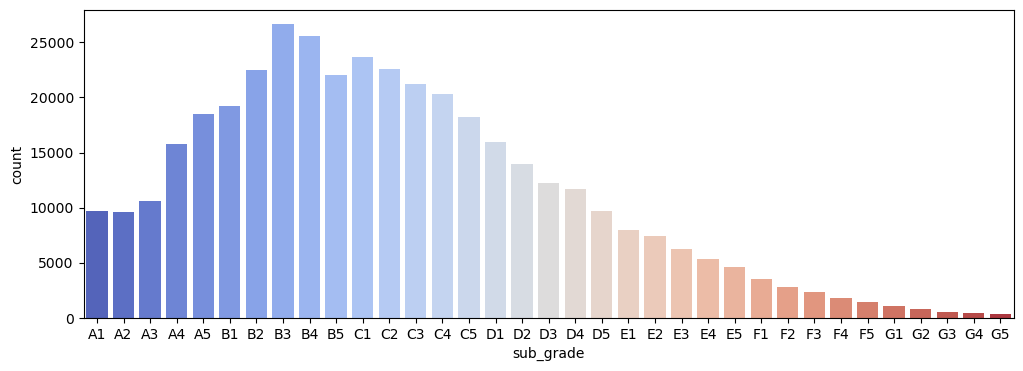

In [57]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

<Axes: xlabel='sub_grade', ylabel='count'>

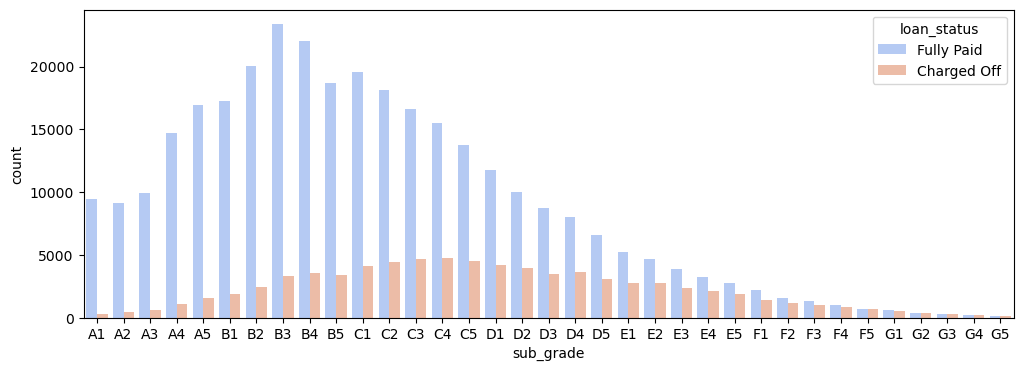

In [59]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

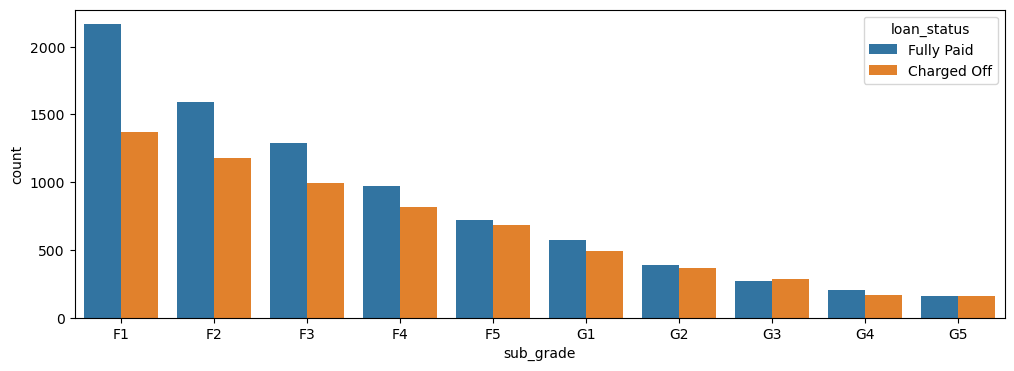

In [61]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

**TASK: Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [35]:
# CODE HERE

In [63]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [65]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [67]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

In [39]:
#CODE HERE

<Axes: >

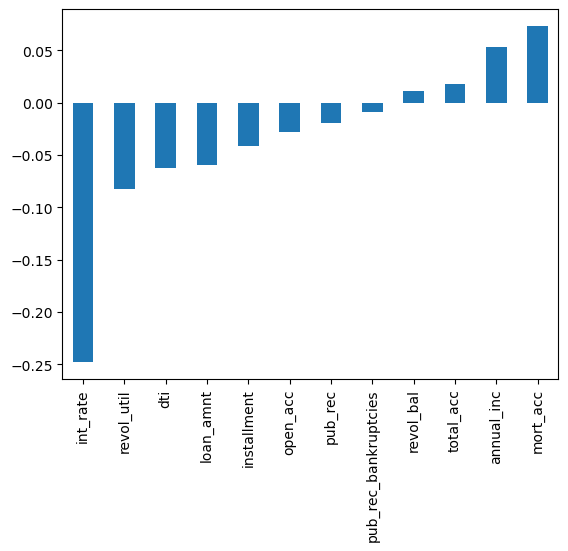

In [71]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Data PreProcessing

**Remove or fill any missing data. Convert categorical string features to dummy variables.**



In [73]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**What is the length of the dataframe?**

In [75]:
len(df)

396030

**Create a Series that displays the total count of missing values per column.**

In [44]:
# CODE HERE

In [77]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [79]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function**

In [81]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**How many unique employment job titles are there?**

In [83]:
df['emp_title'].nunique()

173105

In [85]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

**There are too many unique job titles to try to convert this to a dummy variable feature.**

In [87]:
df = df.drop('emp_title',axis=1)

In [68]:
df = df.drop('emp_length',axis=1)

**what feature columns still have missing data.**

In [ ]:
df.isnull().sum()

**Review the title column vs the purpose column.**

In [ ]:
df['purpose'].head(10)

In [118]:
df['title'].head(10)

KeyError: 'title'

**The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [116]:
df = df.drop('title',axis=1)

KeyError: "['title'] not found in axis"

In [111]:
df = df.drop('mort_acc',axis=1)

KeyError: "['mort_acc'] not found in axis"

In [120]:
df = df.dropna()

In [122]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [124]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [126]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [128]:
# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

C:\Users\sahde\AppData\Local\Temp\ipykernel_27120\62883175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term: int(term[:3]))


### grade feature

In [130]:
df = df.drop('grade',axis=1)

In [132]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [134]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [136]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies', 'address', 'loan_repaid',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [138]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose

In [140]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [142]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [144]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address

In [146]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [148]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

In [150]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line

In [152]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [154]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [156]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [158]:
df = df.drop('loan_status',axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [160]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [162]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
scaler = MinMaxScaler()

In [170]:
X_train = scaler.fit_transform(X_train)

In [171]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [172]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

ModuleNotFoundError: No module named 'tensorflow'

**Build a sequential model to will be trained on the data**

In [131]:
model = Sequential()


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

# Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [138]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

In [141]:
from sklearn.metrics import classification_report,confusion_matrix

In [142]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
model.predict_classes(new_customer.values.reshape(1,78))

In [ ]:
df.iloc[random_ind]['loan_repaid']